Abriendo el dataset

Hay 7160 juegos con rating ESRB
Hay 3631 juegos con rating PEGI
Hay 1872 juegos con rating CERO
En total hay 12663 juegos con rating
Total de géneros únicos iniciales: 247
Se encontraron 159 géneros con posibles similitudes
Género agregado: simulation
Hay 1 géneros únicos
Género agregado: action
Hay 2 géneros únicos
Género agregado: adventure
Hay 3 géneros únicos
Género agregado: role-playing
Hay 4 géneros únicos
Género agregado: action rpg
Hay 5 géneros únicos
Género agregado: first-person
Hay 6 géneros únicos
Género agregado: shooter
Hay 7 géneros únicos
Género agregado: racing/driving
Hay 8 géneros únicos
Género agregado: top-down
Hay 9 géneros únicos
Género agregado: puzzle
Hay 10 géneros únicos
Género agregado: music
Hay 11 géneros únicos
Género agregado: platform
Hay 12 géneros únicos
Género agregado: sports
Hay 13 géneros únicos
Género agregado: card game
Hay 14 géneros únicos
Género agregado: roguelike
Hay 15 géneros únicos
Género agregado: various
Hay 16 géneros únicos
Género 

C:\Users\jose-\AppData\Local\Temp\ipykernel_3464\611062505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.dropna(subset=['game_profile_genre'], inplace=True)  # Eliminamos filas sin género


🎮 Géneros únicos encontrados: ['simulation', 'action', 'adventure', 'role-playing', 'rpg', 'first-person', 'shooter', 'racing', 'driving', 'top-down', 'puzzle', 'music', 'platform', 'sports', 'card', 'game', 'roguelike', 'various', 'arcade', 'visual', 'novel', 'scrolling', 'vertical', 'third-person', 'on-rails', 'open', 'world', 'pinball', 'side', 'point-and-click', 'text', 'real-time', 'strategy', 'city-building', 'shoot', "'em", 'up', 'combat', 'flight', 'simulator', 'vehicular', 'sandbox', 'trivia', 'compilation', 'fighting', 'turn-based', 'tactical', 'action-adventure', 'survival', 'horror', 'massively', 'multiplayer', 'educational', 'history', 'hack-and-slash', 'isometric', '3-d', 'beat', 'em', 'stealth', 'hidden', 'object', 'rhythm', 'life', 'tower', 'defense', 'party', 'augmented', 'reality', 'multidirectional', 'light-gun', 'breakout', 'mech', 'art', 'side-scroller', 'battle', 'arena', 'graphic', 'incremental', 'board', 'space', 'trading', 'tactics', 'casual', 'indie', 'interac

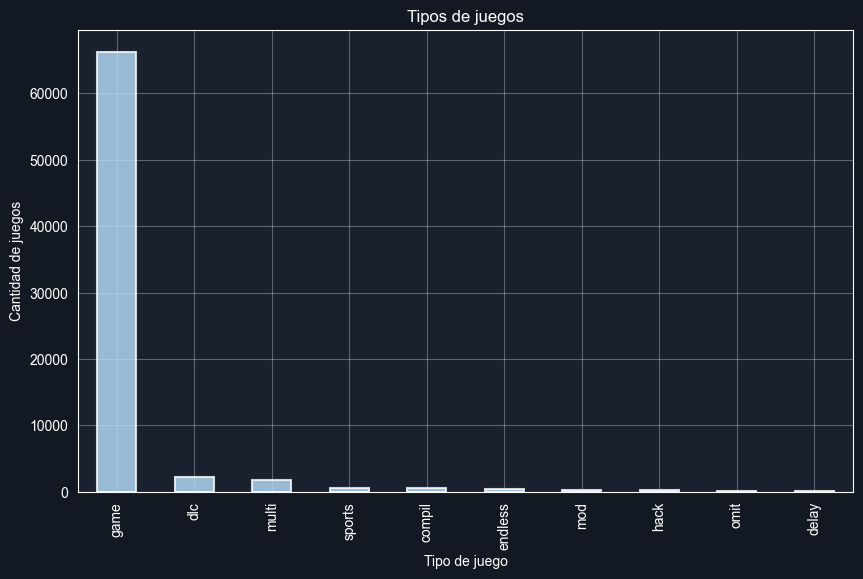

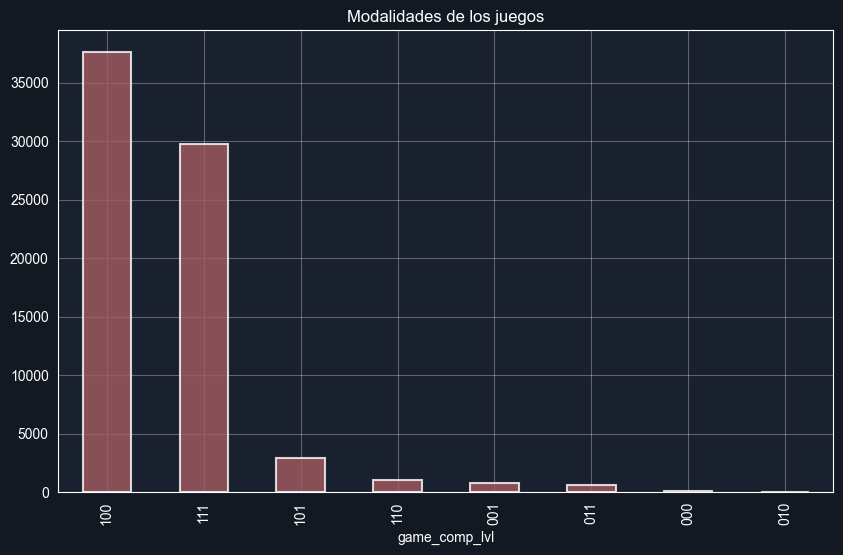

In [20]:
import pandas as pd
%run clean_data.ipynb

In [21]:
# Cargar CSV
df = data_clean

Se crea una tabla con atributos binarios para representar los generos de los juegos.

In [29]:
import pandas as pd

# Leer archivo de sinónimos
genre_map_df = pd.read_excel("genres_map.xlsx", header=None)

# Crear mapa de sinónimos → género principal
genre_map = {}
for row in genre_map_df.itertuples(index=False):
    row_values = [str(cell).strip() for cell in row if pd.notna(cell)]
    if not row_values:
        continue
    principal = row_values[0].strip().lower()  # género principal en minúsculas
    for synonym in row_values:
        genre_map[synonym.strip().lower()] = principal

# Subset del DataFrame
df_subset = df[['game_game_id', 'game_game_name', 'game_profile_genre']].copy()
df_subset['game_profile_genre'] = df_subset['game_profile_genre'].fillna('')

# Normalizar géneros usando el mapa (case-insensitive)
def normalize_genres(genre_str):
    genres = [g.strip().lower() for g in genre_str.split(',') if g.strip()]
    normalized = set()
    for g in genres:
        mapped = genre_map.get(g, g)  # busca en minúsculas
        normalized.add(mapped)
    return list(normalized)

df_subset['genre_list'] = df_subset['game_profile_genre'].apply(normalize_genres)

# Géneros únicos (normalizados, en minúsculas)
all_genres = sorted(set(g for sublist in df_subset['genre_list'] for g in sublist))

# Binarización
genre_df = pd.DataFrame(
    [[1 if genre in genres else 0 for genre in all_genres] for genres in df_subset['genre_list']],
    columns=all_genres
)

# Concatenar con los datos originales
df_game_genre_binary = pd.concat([df_subset[['game_game_id', 'game_game_name']], genre_df], axis=1)

# Vista preliminar
df_game_genre_binary.head()


,game_game_id,game_game_name,2d action platformer,2d versus fighting,2d weapon based fighting,3-d,4x,action,action driving,action role-playing,...,versus fighting,vertical scrolling shooter,vertical shooter,virtual pet,virtual reality,visual novel,war,wargame,western,wrestling
0,1.0,688(I) Hunter/Killer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,Beyond Good & Evil 2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18.0,'Splosion Man,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19.0,.hack//G.U. Vol. 1: Rebirth,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20.0,.hack//G.U. Vol. 2: Reminisce,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Se crea una tabla con atributos binarios para representar las plataformas de los juegos.

In [23]:
# Nos quedamos con las columnas relevantes
df_subset = df[['game_game_id', 'game_game_name', 'game_profile_platform']].copy()

# Rellenar valores nulos con string vacío
df_subset['game_profile_platform'] = df_subset['game_profile_platform'].fillna('')

# Separar las plataformas por coma y eliminar espacios extra
df_subset['platform_list'] = df_subset['game_profile_platform'].apply(
    lambda x: [p.strip() for p in x.split(',') if p.strip() != '']
)

# Obtener todas las plataformas únicas
all_platforms = sorted(set(p for sublist in df_subset['platform_list'] for p in sublist))

# Crear un DataFrame con las columnas de plataforma (1 si el juego está en esa plataforma, 0 si no)
platform_df = pd.DataFrame(
    [[1 if platform in platforms else 0 for platform in all_platforms] for platforms in df_subset['platform_list']],
    columns=all_platforms
)

# Concatenar con el DataFrame original
df_plataform_binary = pd.concat([df_subset[['game_game_id', 'game_game_name']], platform_df], axis=1)

df_plataform_binary.head()

,game_game_id,game_game_name,3DO,Acorn Archimedes,Amazon Luna,Amiga,Amiga CD32,Amstrad CPC,Apple II,Arcade,...,Wii U,Windows Phone,WonderSwan,Xbox,Xbox 360,Xbox One,Xbox Series X/S,ZX Spectrum,ZX81,Zeebo
0,1.0,688(I) Hunter/Killer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,Beyond Good & Evil 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18.0,'Splosion Man,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,19.0,.hack//G.U. Vol. 1: Rebirth,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20.0,.hack//G.U. Vol. 2: Reminisce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Se crea una tabla con atributos binarios para representar los tipos de los juegos.

In [24]:
# Nos quedamos con las columnas relevantes
df_subset = df[['game_game_id', 'game_game_name', 'game_game_type']].copy()

# Rellenar valores nulos con string vacío
df_subset['game_game_type'] = df_subset['game_game_type'].fillna('')

# Separar las plataformas por coma y eliminar espacios extra
df_subset['game_type_list'] = df_subset['game_game_type'].apply(
    lambda x: [p.strip() for p in x.split(',') if p.strip() != '']
)

# Obtener todas las plataformas únicas
all_platforms = sorted(set(p for sublist in df_subset['game_type_list'] for p in sublist))

# Crear un DataFrame con las columnas de plataforma (1 si el juego está en esa plataforma, 0 si no)
platform_df = pd.DataFrame(
    [[1 if platform in platforms else 0 for platform in all_platforms] for platforms in df_subset['game_type_list']],
    columns=all_platforms
)

# Concatenar con el DataFrame original
df_final = pd.concat([df_subset[['game_game_id', 'game_game_name']], platform_df], axis=1)

df_final.head()

,game_game_id,game_game_name,compil,delay,dlc,endless,game,hack,mod,multi,omit,sports
0,1.0,688(I) Hunter/Killer,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2.0,Beyond Good & Evil 2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,18.0,'Splosion Man,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,19.0,.hack//G.U. Vol. 1: Rebirth,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,20.0,.hack//G.U. Vol. 2: Reminisce,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Uniendo dataframes